### IMPORTS & PACKAGES 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### Simple Cost Funcion
## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data 
x_1 = np.linspace(start=-3, stop=3, num=100)

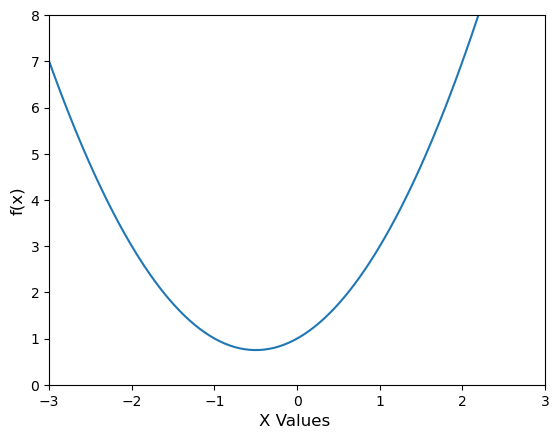

In [4]:
# Plot the generated data 
plt.plot(x_1, f(x_1))
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel("X Values ", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

plt.show()

### Slope & Derivative

- Understaning the power rule and creating charts with subplots
- Slope a function is given by the functions derivative
- Challenge: Create a python function for the derivative of f(x) called df(x)

In [5]:
def df(x):
    return 2*x + 1

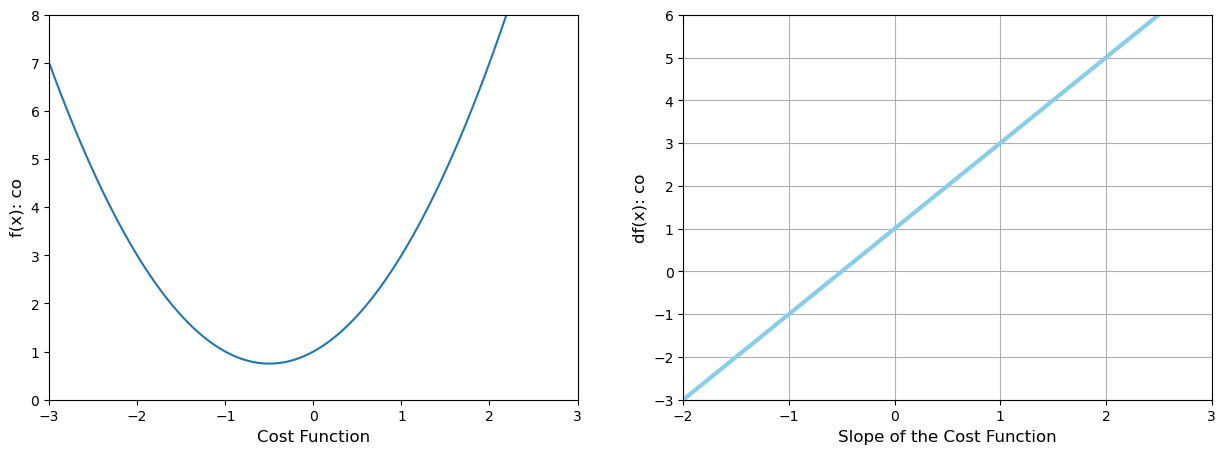

In [6]:
# Plot function and drivative side by side 

# 1 CHART WITH COST FUNCTION
plt.figure(figsize=[15   , 5])
plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1))
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel("Cost Function", fontsize=12)
plt.ylabel("f(x): co", fontsize=12)

# CHART 2 WITH DERIVATIVE 
plt.subplot(1, 2, 2)
plt.grid()
plt.xlim([-2, 3])
plt.ylim([-3, 6])
plt.xlabel("Slope of the Cost Function", fontsize=12)
plt.ylabel("df(x): co", fontsize=12)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)


plt.show()

### Python Loops And GRADIENT DESCENT [ slope ]- Find the lowest costs
its an optimization algorithm for finding the minimum cost 
- starting point
- Learning rate 
- temporal value holder 

In [7]:
new_x = 3
prev_x = 0
precision = 0.0001
step_multiplier = 0.9 # learning rate 

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multiplier * gradient
    x_list.append(new_x)
    
    slope_list.append(df(new_x))
    step_size = abs(new_x - prev_x)
    
    if step_size < precision:
        print("Loop ran for ", n , " times ")
        break 
print("Local minimum occurs at: ", new_x)
print("Slope or df(x) at this point: ", df(new_x))
print("f(x) value or cost at this point: ", f(new_x))

Loop ran for  50  times 
Local minimum occurs at:  -0.5000399629353958
Slope or df(x) at this point:  -7.992587079153068e-05
f(x) value or cost at this point:  0.7500000015970363


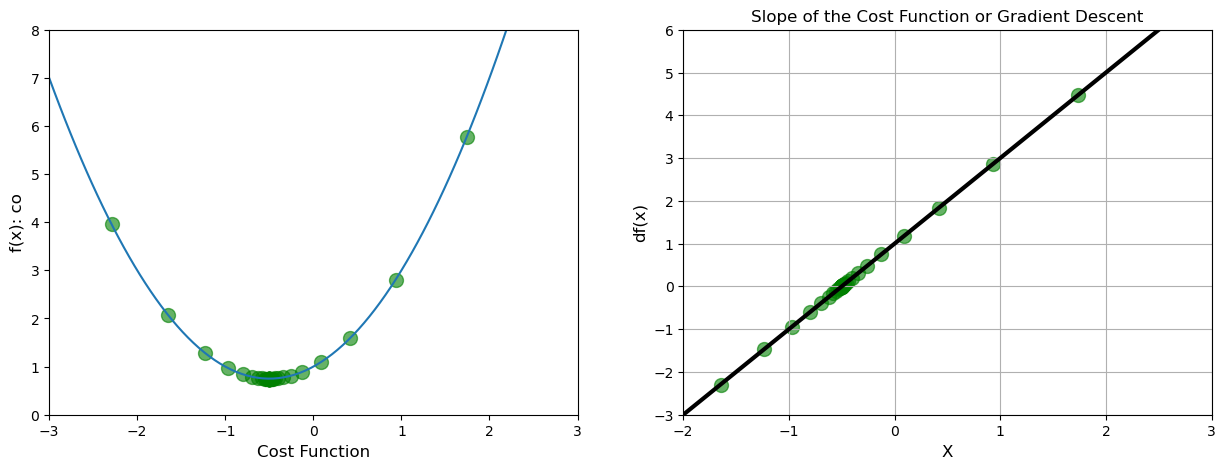

In [43]:



# Superimpose the gradient descent calculation on plot 

# 1 CHART WITH COST FUNCTION
plt.figure(figsize=[15   , 5])
plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1))

values = np.array(x_list)
plt.scatter(x_list, f(values), color='green', s=100, alpha=0.6)

plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel("Cost Function", fontsize=12)
plt.ylabel("f(x): co", fontsize=12)

# CHART 2 WITH DERIVATIVE 
plt.subplot(1, 2, 2)
plt.grid()
plt.xlim([-2, 3])
plt.ylim([-3, 6])
plt.title("Slope of the Cost Function or Gradient Descent", fontsize=12)

plt.xlabel("X", fontsize=12)
plt.ylabel("df(x)", fontsize=12)
plt.plot(x_1, df(x_1), color='black', linewidth=3)
plt.scatter(x_list, slope_list, color='green', s=100, alpha=0.6)



plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### EXAMPLE 2 - ADVANCED FUNCTIONS AND THE PITFALLS OF OPTIMIZATION 
- Multiple Minima vs Initial Guess and Advanced Functions

## $$g(x) = x^4 -4x^2 + 5$$

In [61]:
# Make some data 
x_2 = np.linspace(-2, 2, 1000)
def g(x):
    return x**4 - 4*x**2 + 5 
def dg(x):
    return 4*(x**3) - 8*x

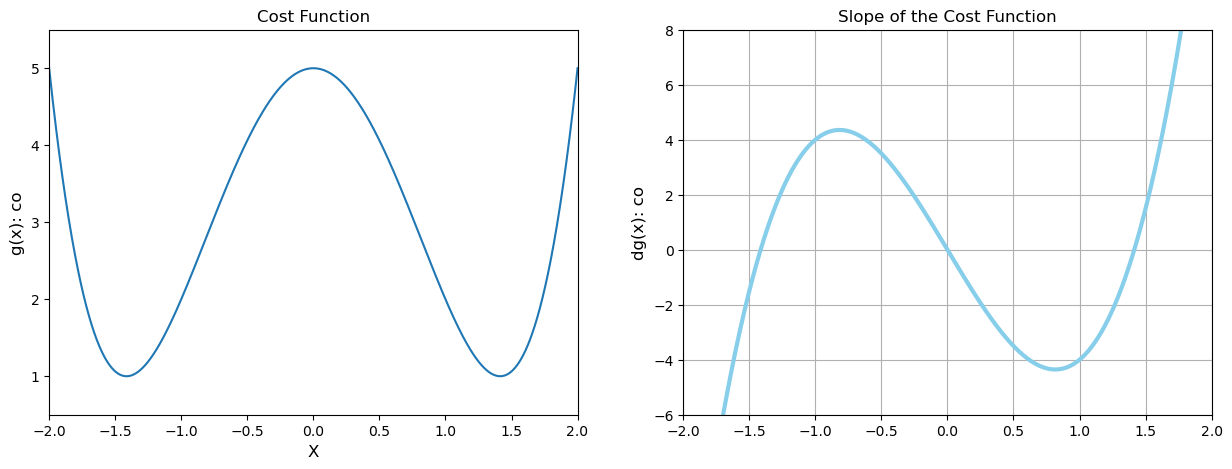

In [44]:
# Plot function and drivative side by side 

# 1 CHART WITH COST FUNCTION
plt.figure(figsize=[15   , 5])
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2))
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.title("Cost Function", fontsize=12)
plt.xlabel("X", fontsize=12)
plt.ylabel("g(x): co", fontsize=12)

# CHART 2 WITH DERIVATIVE 
plt.subplot(1, 2, 2)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.title("Slope of the Cost Function", fontsize=12)
plt.ylabel("dg(x): co", fontsize=12)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)


plt.show()

### Graph Explanation 
 - Looking at the left hand chart, there II minimas that -1.5 and 1.5 on the x-axis of the Cost Function. 
 - Also, on the slope of the cost function on graph at the right, there are three points when the slope is zero(0), little more than -1.5, 0.0 and little less than 1.5. 
 - Those III points corresponds to the II minima and I maxima (0.0) on the left graph.

# Gradient Descent as Python function
#### Parsing a function as argument, make a function return multiple arguments and others 

In [38]:
# multiplier also referred to as learning rate
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    
    new_x = initial_guess 
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - multiplier * gradient
        x_list.append(new_x)

        slope_list.append(df(new_x))
        step_size = abs(new_x - prev_x)

        if step_size < precision:
            break 
    return new_x, x_list, slope_list

In [39]:
local_min, list_x, deriv_list = gradient_descent( derivative_func=dg, initial_guess=0.5,multiplier=0.02, precision=0.001)

print(f"Local min occurs: {local_min}")
print(f"Number of steps: {len(list_x)}")

Local min occurs: 1.4122375085019094
Number of steps: 23


In [41]:
local_min, list_x, deriv_list = gradient_descent( derivative_func=dg, initial_guess=0.1)

print(f"Local min occurs: {local_min}")
print(f"Number of steps: {len(list_x)}")

Local min occurs: 1.4120887490901561
Number of steps: 34


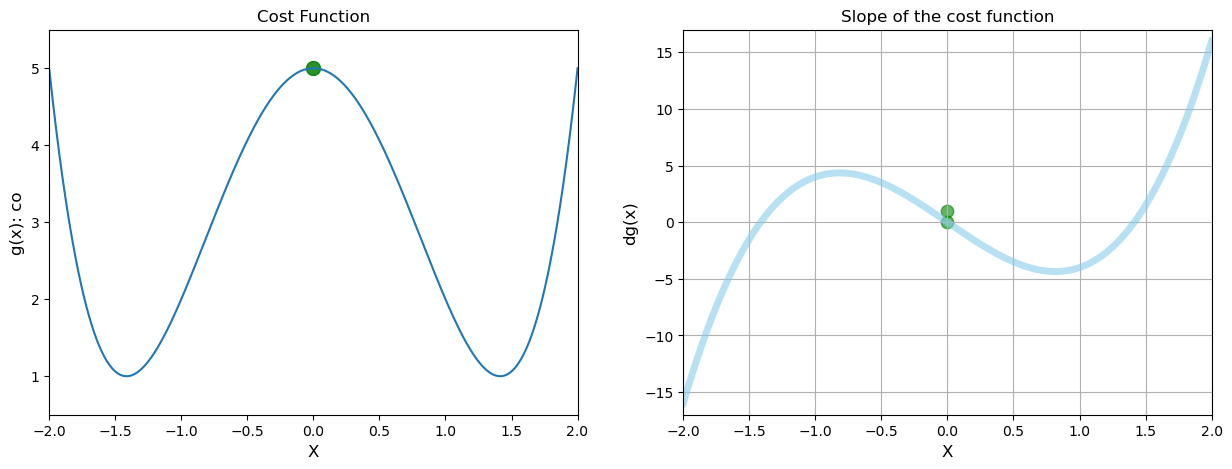

In [67]:
# Calling Gradient descent function 
local_min, list_x, deriv_list = gradient_descent( derivative_func=dg, initial_guess=0)

# Plot function, drivative and scatter plot side by side 

# 1 CHART WITH COST FUNCTION
plt.figure(figsize=[15   , 5])
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2))
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.title("Cost Function", fontsize=12)
plt.xlabel("X", fontsize=12)
plt.ylabel("g(x): co", fontsize=12)

# SCATTER PLOT 
plt.scatter(list_x, g(np.array(list_x)), color="green", s=100, alpha=0.6)

# CHART 2 WITH DERIVATIVE 
plt.subplot(1, 2, 2)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-17, 17])
plt.title("Slope of the cost function", fontsize=12)
plt.xlabel("X", fontsize=12)
plt.ylabel("dg(x)", fontsize=12)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color="green", s=80, alpha=0.6)



plt.show()

In [ ]:
# 